In [2]:
### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sph6004-assessment1-mimic-iv/Assignment_1_data.csv
/kaggle/input/mei-sph6004-pretrain-data/mei_pretrain_data.csv


# 1. Data read

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data
path = '../input/mei-sph6004-pretrain-data/'
df = pd.read_csv(path+'mei_pretrain_data.csv')
df

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,1.0,55.0,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,1.705939,1.495632,1512.26836,0.0,0.0,1.0,0.0,1.0,3.0,0.0
1,1.0,85.0,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,1.705939,1.495632,2020.00000,1.0,0.0,1.0,1.0,1.0,8.0,0.0
2,1.0,45.0,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,1.100000,1.100000,1512.26836,1.0,0.0,1.0,1.0,0.0,4.0,0.0
3,1.0,75.0,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,1.705939,1.495632,1592.00000,0.0,0.0,0.0,0.0,1.0,6.0,0.0
4,1.0,75.0,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,0.900000,0.800000,339.00000,0.0,0.0,4.0,1.0,3.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,0.0,85.0,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,0.600000,0.500000,697.00000,0.0,0.0,1.0,4.0,1.0,10.0,0.0
36485,0.0,35.0,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,1.705939,1.495632,2000.00000,0.0,0.0,1.0,1.0,0.0,0.0,0.0
36486,0.0,65.0,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,1.705939,1.495632,1512.26836,0.0,0.0,1.0,0.0,0.0,3.0,0.0
36487,1.0,75.0,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,1.705939,1.495632,1900.00000,0.0,0.0,0.0,1.0,0.0,5.0,0.0


In [5]:
df.describe()

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
count,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,...,36489.000000,36489.000000,36489.000000,36489.00000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000
mean,0.544822,65.995368,70.935003,103.109572,84.855578,60.431578,105.481843,79.256223,94.454735,147.677286,...,1.705939,1.495632,1512.268360,0.47776,0.261915,1.060237,0.914906,0.826002,5.798104,0.036422
std,0.497994,17.116974,15.049239,20.662520,15.961682,13.333521,23.320004,11.745911,16.679284,22.796128,...,2.926152,2.649308,650.843086,0.82313,0.734331,0.971356,1.050688,1.201319,3.014789,0.187340
min,0.000000,15.000000,9.000000,36.000000,28.500000,0.830000,51.000000,42.513889,2.000000,49.000000,...,0.100000,0.100000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,55.000000,60.000000,88.000000,73.347826,53.000000,91.000000,70.916667,84.000000,132.000000,...,0.600000,0.600000,1090.000000,0.00000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000
50%,1.000000,65.000000,70.000000,101.000000,83.541667,60.000000,102.000000,77.880000,93.000000,146.000000,...,1.705939,1.495632,1512.268360,0.00000,0.000000,1.000000,1.000000,0.000000,6.000000,0.000000
75%,1.000000,75.000000,80.000000,115.000000,95.230769,68.000000,115.000000,86.363636,104.000000,161.000000,...,1.705939,1.495632,1900.000000,1.00000,0.000000,1.000000,1.000000,1.000000,8.000000,0.000000
max,1.000000,105.000000,163.000000,295.000000,174.740741,133.000000,299.000000,151.529412,184.000000,335.000000,...,78.000000,67.800000,3000.000000,4.00000,4.000000,4.000000,4.000000,4.000000,20.000000,1.000000


In [6]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      36489 non-null  float64
 1   age                         36489 non-null  float64
 2   heart_rate_min              36489 non-null  float64
 3   heart_rate_max              36489 non-null  float64
 4   heart_rate_mean             36489 non-null  float64
 5   mbp_min                     36489 non-null  float64
 6   mbp_max                     36489 non-null  float64
 7   mbp_mean                    36489 non-null  float64
 8   sbp_min                     36489 non-null  float64
 9   sbp_max                     36489 non-null  float64
 10  sbp_mean                    36489 non-null  float64
 11  dbp_min                     36489 non-null  float64
 12  dbp_max                     36489 non-null  float64
 13  dbp_mean                    364

# 2. Explore Data Analysis (EDA)
## 👉🏻 Please go to mei-sph6004-part 1

# 3. Feature Engineering 

In [8]:
from sklearn.model_selection import cross_validate, KFold, train_test_split, GridSearchCV

X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

print(X.shape)
print(y.shape)


(36489, 46)
(36489,)


## 3.1 Data Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# StandardScaler作用：去均值和方差归一化
X = StandardScaler().fit_transform(X)

## 3.2 Data split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 3.3 SMOTE

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# oversampling/undersampling
X_train, y_train = smote.fit_resample(X_train, y_train)

# 4. Baseline of LogisticRegression

In [12]:
# Load Data Modelling Libraries
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

## 4.1 Model Training

In [13]:
log_reg = LogisticRegression()

# 定义参数空间
param_grid_lr = {
    'penalty': ['l2'],#' l1',
    'C': [0.1,1],
    'max_iter':[200],
    'solver': ['liblinear',], #,'saga'
    'random_state':[42],
    'class_weight':['balanced'],
}   

# 定义网格搜索
grid_search_lr = GridSearchCV(
    log_reg,
    param_grid=param_grid_lr,
    scoring=['recall','f1','accuracy'],
    refit='recall',
    cv=5,
    n_jobs=-1,
    verbose=10
)

start = time()
# 进行网格搜索
grid_search_lr.fit(X_train, y_train)

end = time()
print(f"took { str(end - start)[:7] } seconds")

# 输出最优参数和最优得分
print(f"Best parameters: {grid_search_lr.best_params_}")
print(f"Best Recall scores: {grid_search_lr.best_score_}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
took 10.3687 seconds
Best parameters: {'C': 1, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Best Recall scores: 0.6662995203410909


In [14]:
# 对测试集进行预测
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)

# # 输出评价指标
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lr))
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)

Logistic Regression:
Accuracy: 0.7455467251301726
Precision: 0.10010162601626016
Recall: 0.696113074204947
F1-score: 0.17503331852509996
ROC AUC: 0.7218270289057522


## 4.2 Confusion Matrix

Text(50.722222222222214, 0.5, 'True')

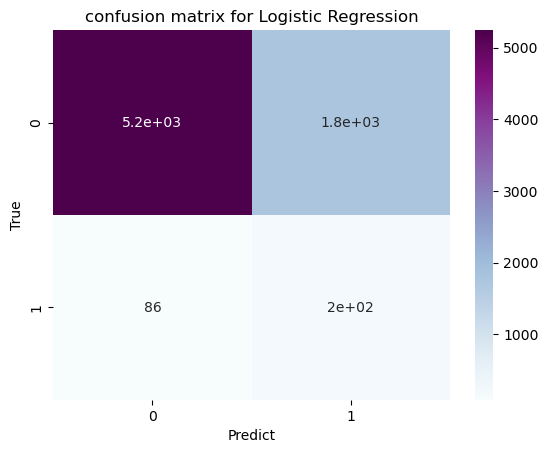

In [15]:
from sklearn.metrics import confusion_matrix

cm_lr= confusion_matrix(y_test, y_pred_lr, labels=[0, 1])

fig, ax =plt.subplots()

sns.heatmap(cm_lr,annot=True,ax=ax, cmap="BuPu") #画热力图
ax.set_title('confusion matrix for Logistic Regression')
ax.set_xlabel('Predict')
ax.set_ylabel('True')

In [17]:
feature_list = df.columns[:-1]
print('feature_list:',feature_list)

importances = list(grid_search_lr.best_estimator_.coef_)
importances

feature_list: Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean',
       'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_min', 'sbp_max', 'sbp_mean',
       'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'lactate_min', 'lactate_max', 'ph_min', 'ph_max',
       'glucose_min', 'glucose_max', 'wbc_min', 'wbc_max', 'creatinine_min',
       'creatinine_max', 'hemoglobin_min', 'hemoglobin_max', 'pt_min',
       'pt_max', 'alt_max', 'alt_min', 'alp_max', 'alp_min', 'ast_min',
       'ast_max', 'bilirubin_total_max', 'bilirubin_total_min', 'urineoutput',
       'sofa_coagulation', 'sofa_liver', 'sofa_cardiovascular', 'sofa_cns',
       'sofa_renal', 'charlson_comorbidity_index'],
      dtype='object')


[array([ 0.21449069, -0.09641759,  0.30173081,  0.06825824, -0.16485355,
        -0.0083953 ,  0.01095313,  0.29699954, -0.13927299,  0.29618333,
        -0.32272494,  0.03876755, -0.11422979, -0.25541949,  0.2037499 ,
         0.06831692, -0.04293146,  0.02691402,  0.06967435,  0.09107965,
        -0.04375773,  0.12457639, -0.1648744 ,  0.14134608, -0.14083119,
         0.08068257, -0.09878566,  0.03768236, -0.06413061, -0.08945459,
         0.06079608, -0.0118028 , -0.03886198, -0.46117039,  0.37561512,
         0.00989029, -0.00584823,  0.07150279, -0.03648755, -0.22962763,
        -0.07101906,  0.07233325, -0.00147765,  0.86679625, -0.09431015,
         0.13181155])]

## 4.3 Feature Importances

In [32]:
# Dictionaries with variable and importance
feature_importances = {feature:round(importance, 2) for feature, importance in zip(feature_list, importances[0])}

feature_importances

{'gender': 0.21,
 'age': -0.1,
 'heart_rate_min': 0.3,
 'heart_rate_max': 0.07,
 'heart_rate_mean': -0.16,
 'mbp_min': -0.01,
 'mbp_max': 0.01,
 'mbp_mean': 0.3,
 'sbp_min': -0.14,
 'sbp_max': 0.3,
 'sbp_mean': -0.32,
 'dbp_min': 0.04,
 'dbp_max': -0.11,
 'dbp_mean': -0.26,
 'temperature_min': 0.2,
 'temperature_max': 0.07,
 'temperature_mean': -0.04,
 'lactate_min': 0.03,
 'lactate_max': 0.07,
 'ph_min': 0.09,
 'ph_max': -0.04,
 'glucose_min': 0.12,
 'glucose_max': -0.16,
 'wbc_min': 0.14,
 'wbc_max': -0.14,
 'creatinine_min': 0.08,
 'creatinine_max': -0.1,
 'hemoglobin_min': 0.04,
 'hemoglobin_max': -0.06,
 'pt_min': -0.09,
 'pt_max': 0.06,
 'alt_max': -0.01,
 'alt_min': -0.04,
 'alp_max': -0.46,
 'alp_min': 0.38,
 'ast_min': 0.01,
 'ast_max': -0.01,
 'bilirubin_total_max': 0.07,
 'bilirubin_total_min': -0.04,
 'urineoutput': -0.23,
 'sofa_coagulation': -0.07,
 'sofa_liver': 0.07,
 'sofa_cardiovascular': -0.0,
 'sofa_cns': 0.87,
 'sofa_renal': -0.09,
 'charlson_comorbidity_index': 0.

In [33]:
# Sort the feature importances in decreasing order
feature_importances = sorted(feature_importances.items(), key = lambda x: x[1], reverse = True)

# # Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: sofa_cns             Importance: 0.87
Variable: alp_min              Importance: 0.38
Variable: heart_rate_min       Importance: 0.3
Variable: mbp_mean             Importance: 0.3
Variable: sbp_max              Importance: 0.3
Variable: gender               Importance: 0.21
Variable: temperature_min      Importance: 0.2
Variable: wbc_min              Importance: 0.14
Variable: charlson_comorbidity_index Importance: 0.13
Variable: glucose_min          Importance: 0.12
Variable: ph_min               Importance: 0.09
Variable: creatinine_min       Importance: 0.08
Variable: heart_rate_max       Importance: 0.07
Variable: temperature_max      Importance: 0.07
Variable: lactate_max          Importance: 0.07
Variable: bilirubin_total_max  Importance: 0.07
Variable: sofa_liver           Importance: 0.07
Variable: pt_max               Importance: 0.06
Variable: dbp_min              Importance: 0.04
Variable: hemoglobin_min       Importance: 0.04
Variable: lactate_min          Importa

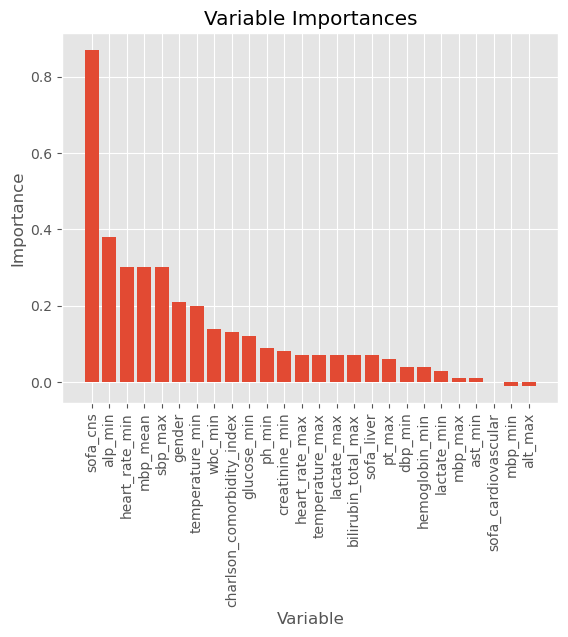

In [34]:
plt.style.use('ggplot')

top = 26
# the x axis for the plot 
x_axis = [i for i in range(top)]
plot_importance = feature_importances[:top]

# Creat a bar plot 
plt.bar(x_axis, [i[1] for i in plot_importance], orientation = 'vertical')
# Define xtick labels 
plt.xticks(x_axis, [i[0] for i in plot_importance], rotation='vertical')
# Define axis labels and titles
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances');

# 5. Model optimization 

## 5.1 Feature Select

### Genetic Algorithm (GA)

In [38]:
!pip install sklearn-genetic

In [39]:
from genetic_selection import GeneticSelectionCV

In [ ]:
from genetic_selection import GeneticSelectionCV

estimator = LogisticRegression(
    learning_rate=0.3,
    max_depth=12,
    max_leaves=20, 
    n_estimators=100, 
    objective='binary:logistic', 
    random_state=42, 
    subsample=1, 
    tree_method='gpu_hist'
)

GA_model = GeneticSelectionCV(
    estimator, 
    cv=5, 
    verbose=0,
    scoring="accuracy", 
    max_features=5,
    n_population=20, 
    crossover_proba=0.5,
    mutation_proba=0.2, 
    n_generations=10,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, 
    n_gen_no_change=10,
    caching=True, 
    n_jobs=-1
)
GA_model = GA_model.fit(X, y)
print('Features:', X.columns[GA_model.support_])

In [47]:
# 实例化LogisticRegression

estimator= LogisticRegression(
    penalty= 'l2',
    C = 1,
    max_iter=200,
    solver='liblinear', #,'saga'
    random_state=42,
    class_weight='balanced',
)

GA_model = GeneticSelectionCV(
    estimator, 
    cv=5, 
    verbose=10,
    scoring="accuracy", 
    max_features=30,
    n_population=20, 
    crossover_proba=0.5,
    mutation_proba=0.2, 
    n_generations=20,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=5, 
    n_gen_no_change=10,
    caching=True, 
    n_jobs=-1
)
GA_model = GA_model.fit(X_train, y_train)


Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	20    	[  0.65946   14.55       0.005454]	[ 0.06288   9.383363  0.00243 ]	[ 0.577516  1.        0.001575]	[  0.771712  30.         0.01032 ]
1  	12    	[  0.73661   17.7        0.003109]	[ 0.051377  5.320714  0.001429]	[ 0.638521  3.        0.001251]	[  0.776179  25.         0.007096]
2  	13    	[  0.771907  15.35       0.002848]	[ 0.002398  2.127792  0.000784]	[  0.767546  12.         0.001604]	[  0.778783  21.         0.004287]
3  	12    	[  0.776366  13.65       0.003628]	[ 0.003266  1.492481  0.000905]	[  0.77089  10.        0.00197]   	[  0.785826  17.         0.005173]
4  	9     	[  0.780824  12.         0.00431 ]	[ 0.004226  1.67332   0.000712]	[ 0.771191  8.        0.002886]   	[  0.789087  15.         0.005684]
5  	11    	[  0.785366  11.4        0.004284]	[ 0.004581  0.916515  0.000671]	

In [48]:
GA_model.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True, False, False,  True, False,
       False])

In [64]:
ga_select_cols=[]
ga_select_cols_index=[]
for index,i in enumerate(GA_model.support_):
    if i==True:
        ga_select_cols.append(df.columns[index])
        ga_select_cols_index.append(index)
print('GA select feature columns:',ga_select_cols)

GA select feature columns: ['dbp_mean', 'ph_min', 'glucose_max', 'alp_min', 'ast_min', 'sofa_coagulation', 'sofa_cns']


In [65]:
ga_select_cols_index

[13, 19, 22, 34, 35, 40, 43]

In [73]:
sub_X=X[:,ga_select_cols_index]
sub_X.shape

(36489, 7)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(sub_X, y, test_size=0.2, random_state=1)

In [75]:
log_reg = LogisticRegression()

# 定义参数空间
param_grid_lr = {
    'penalty': ['l2'],#' l1',
    'C': [0.1,1],
    'max_iter':[200],
    'solver': ['liblinear',], #,'saga'
    'random_state':[42],
    'class_weight':['balanced'],
}   

# 定义网格搜索
grid_search_lr = GridSearchCV(
    log_reg,
    param_grid=param_grid_lr,
    scoring=['recall','f1','accuracy'],
    refit='recall',
    cv=5,
    n_jobs=-1,
    verbose=10
)

start = time()
# 进行网格搜索
grid_search_lr.fit(X_train, y_train)

end = time()
print(f"took { str(end - start)[:7] } seconds")

# 输出最优参数和最优得分
print(f"Best parameters: {grid_search_lr.best_params_}")
print(f"Best Recall scores: {grid_search_lr.best_score_}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
took 1.24429 seconds
Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Best Recall scores: 0.5726680337206653


In [76]:
# 对测试集进行预测
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)

# # 输出评价指标
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lr))
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)

Logistic Regression:
Accuracy: 0.7948753083036448
Precision: 0.11288265306122448
Recall: 0.6254416961130742
F1-score: 0.1912479740680713
ROC AUC: 0.7135761581064302
